# Portfolio Optimization

## Importing Libraries and Dataframes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp
import numpy as np

%matplotlib inline

In [2]:
df_in_sample= pd.read_csv('monthly_closings_2018_to_2020.csv')
df_in_sample=df_in_sample.set_index('Date')
df_in_sample

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13.740000,64.900764,27.397306,204.289993,9.464570,29.212917,65.913818,10.430466,53.549736,186.889999,...,222.232788,218.483643,52.943863,7.32,164.870193,39.982342,60.957558,48.101372,102.605919,120.929955
2018-02-01,12.110000,56.789257,26.595846,186.139999,9.257274,29.304205,61.587685,12.223202,50.842533,178.320007,...,212.265274,205.409531,52.875637,5.83,162.738815,42.535130,54.352787,43.124111,102.988831,119.674240
2018-03-01,10.050000,56.235203,25.398247,183.539993,9.667352,27.377983,60.756409,11.449066,51.999256,159.789993,...,200.852341,192.592194,50.741047,6.96,155.848129,40.229286,54.898434,43.142376,98.057846,116.645149
2018-04-01,10.880000,67.682632,25.379751,178.539993,9.806952,27.416567,58.421768,14.404930,49.542076,172.000000,...,222.610748,170.544785,41.922886,7.93,156.890533,39.625057,60.538544,42.859261,96.996758,123.724594
2018-05-01,13.730000,73.762344,25.130117,198.009995,10.212634,26.610199,57.699131,12.217362,51.278229,191.779999,...,227.422699,173.036407,42.518581,6.71,165.790802,44.806568,62.351170,42.649212,95.902344,127.469086
2018-06-01,14.990000,73.306801,24.584606,185.529999,9.788214,25.936863,53.508331,13.125407,47.278862,194.320007,...,231.029251,173.769394,37.156170,7.35,167.331055,44.555717,62.285557,39.242756,93.384048,129.363617
2018-07-01,18.330000,74.186356,25.953985,187.229996,8.877476,28.411858,55.310310,13.641843,51.936115,172.580002,...,239.293106,187.549377,38.702713,7.15,172.378448,45.802532,63.680645,40.364388,103.018181,133.553680
2018-08-01,25.170000,70.597687,26.306849,175.009995,8.500157,28.457863,57.411049,15.943378,56.191364,175.729996,...,253.694901,186.312759,39.622807,6.21,182.343109,54.790226,61.467693,39.226181,103.244614,143.467148
2018-09-01,30.889999,72.630684,25.610409,164.759995,8.293930,27.105352,60.024891,17.156921,55.566803,164.460007,...,251.408035,187.374786,40.560379,5.39,181.502930,54.525864,62.541138,39.624092,101.676750,146.812881


In [3]:
df_out_of_sample= pd.read_csv('monthly_closings_2021.csv')
df_out_of_sample=df_out_of_sample.set_index('Date').dropna()
df_out_of_sample

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,85.639999,19.984137,28.448484,253.830002,10.423653,28.948441,18.670000,13.260000,37.959999,258.329987,...,327.984192,168.625778,17.170000,12.59,313.051849,130.984589,37.564899,48.648792,124.770065,191.758194
2021-02-01,84.510002,26.509365,31.750275,237.759995,11.581836,33.888718,26.750000,8.010000,47.939999,257.619995,...,326.647034,168.049774,20.940001,10.28,312.633881,120.363693,46.000759,48.362968,143.737076,210.750427
2021-03-01,78.500000,26.519325,33.460136,226.729996,12.126281,37.774540,26.540001,10.210000,48.279999,294.529999,...,365.828552,186.488373,23.900000,10.92,317.599945,121.428291,46.870140,45.987694,148.679062,210.421692
2021-04-01,81.620003,25.272585,35.789776,230.949997,11.423451,39.767548,27.959999,10.030000,46.919998,325.079987,...,393.503174,190.805069,21.719999,11.38,336.794342,130.683289,47.686050,45.613171,150.222214,232.116791
2021-05-01,80.080002,25.870514,37.497345,213.960007,14.383254,41.592560,29.559999,26.120001,47.680000,328.730011,...,406.448944,196.515472,24.240000,10.33,332.748688,123.873756,50.408760,45.573750,161.353668,225.895493
2021-06-01,93.930000,31.162212,36.214199,226.779999,14.709921,40.454380,26.360001,56.680000,43.259998,347.709991,...,395.121429,193.661896,21.209999,12.92,353.176147,136.382065,52.011490,45.662453,152.806564,232.712738
2021-07-01,106.190002,26.018948,36.189194,195.190002,13.809112,37.796810,21.650000,37.020000,39.900002,356.299988,...,408.234650,192.989166,20.379999,12.15,363.701721,145.244492,48.173397,40.087238,149.112656,245.223221
2021-08-01,110.720001,25.610220,38.052162,166.990005,12.898404,41.137039,24.139999,47.130001,40.439999,379.380005,...,412.245483,189.869217,19.940001,10.94,379.045135,151.189301,47.207783,40.482769,158.044586,228.015091
2021-09-01,102.900002,29.488138,37.190041,148.050003,14.016992,41.826763,25.010000,38.060001,42.610001,339.390015,...,386.962341,172.338013,20.520000,8.24,357.107483,141.113998,50.806889,38.495220,161.740036,221.997375


## Computing Monthly Returns 

Although I could have used the pct_change function from pandas, I wanted to learn how to do it manually. If the dataframe was larger, I would have definitely used the function to avoid a long runtime of the cell with the nested for loops.

In [4]:
monthly_returns=np.zeros((df_in_sample.shape[0]-1,df_in_sample.shape[1]))
for i in range(df_in_sample.shape[0]-1):
    for j in range(df_in_sample.shape[1]):
        monthly_returns[i,j]=(df_in_sample.iloc[i+1,j]-df_in_sample.iloc[i,j])/(df_in_sample.iloc[i,j])
        
monthly_returns_df=pd.DataFrame(monthly_returns, index=df_in_sample.index[1:], columns=df_in_sample.columns)
monthly_returns_df

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-01,-0.118632,-0.124983,-0.029253,-0.088844,-0.021902,0.003125,-0.065633,0.171875,-0.050555,-0.045856,...,-0.044852,-0.059840,-0.001289,-0.203552,-0.012928,0.063848,-0.108350,-0.103474,0.003732,-0.010384
2018-03-01,-0.170107,-0.009756,-0.045030,-0.013968,0.044298,-0.065732,-0.013497,-0.063333,0.022751,-0.103914,...,-0.053767,-0.062399,-0.040370,0.193825,-0.042342,-0.054210,0.010039,0.000424,-0.047879,-0.025311
2018-04-01,0.082587,0.203563,-0.000728,-0.027242,0.014440,0.001409,-0.038426,0.258175,-0.047254,0.076413,...,0.108330,-0.114477,-0.173788,0.139368,0.006689,-0.015020,0.102737,-0.006562,-0.010821,0.060692
2018-05-01,0.261949,0.089827,-0.009836,0.109051,0.041367,-0.029412,-0.012369,-0.151862,0.035044,0.115000,...,0.021616,0.014610,0.014209,-0.153846,0.056729,0.130763,0.029942,-0.004901,-0.011283,0.030265
2018-06-01,0.091770,-0.006176,-0.021707,-0.063027,-0.041558,-0.025304,-0.072632,0.074324,-0.077993,0.013244,...,0.015858,0.004236,-0.126119,0.095380,0.009290,-0.005599,-0.001052,-0.079871,-0.026259,0.014863
2018-07-01,0.222815,0.011998,0.055701,0.009163,-0.093044,0.095424,0.033677,0.039346,0.098506,-0.111877,...,0.035770,0.079300,0.041623,-0.027211,0.030164,0.027983,0.022398,0.028582,0.103167,0.032390
2018-08-01,0.373159,-0.048374,0.013596,-0.065267,-0.042503,0.001619,0.037981,0.168711,0.081932,0.018252,...,0.060185,-0.006594,0.023773,-0.131469,0.057807,0.196227,-0.034751,-0.028198,0.002198,0.074228
2018-09-01,0.227255,0.028797,-0.026474,-0.058568,-0.024262,-0.047527,0.045529,0.076116,-0.011115,-0.064132,...,-0.009014,0.005700,0.023662,-0.132045,-0.004608,-0.004825,0.017464,0.010144,-0.015186,0.023321
2018-10-01,-0.410489,-0.175474,-0.042908,-0.136441,0.032432,-0.062018,-0.121217,0.023424,-0.053605,-0.077040,...,-0.014314,-0.097053,-0.151222,-0.152134,-0.084312,-0.030478,-0.107185,-0.082438,-0.033853,-0.081551


## Computing Covariance Matrix and Means of Returns

### Covariance Matrix

In [5]:
Q=np.array(monthly_returns_df.cov())
Q

array([[ 2.88430400e-02,  1.00470216e-02,  5.62869469e-03,
         8.22445990e-03,  3.93629170e-03,  7.29802407e-03,
         9.85516406e-03,  1.28548206e-02,  5.63253278e-03,
         8.89135357e-03,  1.03718544e-02,  6.17115734e-04,
         7.39235931e-03,  5.95711592e-03,  6.11673425e-03,
         6.38955654e-03,  5.02546219e-03,  7.88523928e-03,
         4.68181583e-03,  6.71548875e-03,  8.14888585e-03,
         7.93744138e-03,  4.94863669e-03,  5.28775058e-03,
         5.51874037e-03],
       [ 1.00470216e-02,  5.10928306e-02,  1.07829513e-02,
         5.24590600e-04,  1.16603389e-02,  1.36166011e-02,
         2.88528349e-02,  3.37220943e-02,  1.57081734e-02,
         8.10486915e-03,  8.44854712e-03, -2.92240477e-04,
         2.18248658e-02,  7.87454820e-03,  1.16224095e-02,
         6.34418858e-03,  6.84084842e-03,  1.98381917e-02,
         6.77433874e-02,  7.91904990e-03,  7.81472597e-03,
         2.26808944e-02,  5.06285180e-03,  1.08325655e-02,
         8.03641435e-03],
    

### Means

In [6]:
mu=np.array(monthly_returns_df.mean())
mu

array([ 0.06967341, -0.01090347,  0.00394663,  0.00831277,  0.00310364,
        0.00451495, -0.01517963, -0.00816421, -0.00068068,  0.01523853,
        0.02702516,  0.01030652,  0.09088595,  0.0138596 , -0.01567046,
        0.01483785, -0.00527943, -0.02348367,  0.10211635,  0.02007571,
        0.03939124, -0.00818404, -0.00042802,  0.00834558,  0.01877771])

To compute the classical Markowitz efficient frontier, I will follow the three steps:
1. Compute minimum variance portfolio
2. Compute maximum return portolio
3. compute efficient frontier (mean-variance)

The optimization formulation will be included in each step.

## Solving for Minimum Variance Portfolio

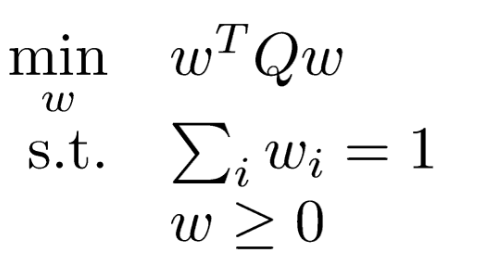

In [7]:
n=len(mu)
w1 = cp.Variable(n)
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)),
                 [sum(w1) == 1,
                  w1 >= 0])
prob1.solve(verbose=True)

print("\nSolution status: ", prob1.status)
print("Solution optimal value: ", prob1.value)
print("Solution w: ")
print(w1.value)

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Mar 23 11:01:14 PM: Your problem has 25 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 23 11:01:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 23 11:01:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 23 11:01:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 23 11:01:14 PM: Compiling problem (target solver=OSQP).
(CVXPY) Mar 23 11:01:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing

In [8]:
w_minVar = w1.value
var_minVar_clas = np.dot(w_minVar, np.dot(Q, w_minVar))
ret_minVar_clas = np.dot(mu, w_minVar)
print("Minimum variance portfolio:\n")
print("   Solution status =", prob1.status)
print("    Solution value =", prob1.value)
print("          Variance =", var_minVar_clas)
print("   Expected return =", ret_minVar_clas)
print("Standard deviation =", np.sqrt(var_minVar_clas))

Minimum variance portfolio:

   Solution status = optimal
    Solution value = 0.0009278939303461072
          Variance = 0.0009278939303461072
   Expected return = 0.008653285914910977
Standard deviation = 0.03046135142021948


## Solving for Maximum Return Portfolio

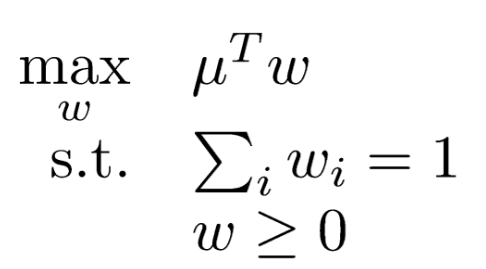

In [9]:
w2 = cp.Variable(n)
prob2 = cp.Problem(cp.Maximize(mu.T@w2),
                 [sum(w2) == 1,
                  w2 >= 0])
prob2.solve(verbose=True)

print("\nSolution status: ", prob2.status)
print("Solution optimal value: ", prob2.value)
print("Solution w: ")
print(w2.value)

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Mar 23 11:01:14 PM: Your problem has 25 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 23 11:01:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 23 11:01:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 23 11:01:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 23 11:01:14 PM: Compiling problem (target solver=ECOS).
(CVXPY) Mar 23 11:01:14 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Cone

In [10]:
w_maxRet = w2.value
var_maxRet_clas = np.dot(w_maxRet, np.dot(Q, w_maxRet))
ret_maxRet_clas = np.dot(mu, w_maxRet)
print("Maximum return portfolio:\n")
print("   Solution status =", prob2.status)
print("    Solution value =", prob2.value)
print("   Expected return =", ret_maxRet_clas)
print("          Variance =", var_maxRet_clas)
print("Standard deviation =", np.sqrt(var_maxRet_clas))

Maximum return portfolio:

   Solution status = optimal
    Solution value = 0.10211634693131111
   Expected return = 0.10211634693131111
          Variance = 0.33974851965068
Standard deviation = 0.582879506974366


## e) Mean-Variance Efficient Frontier

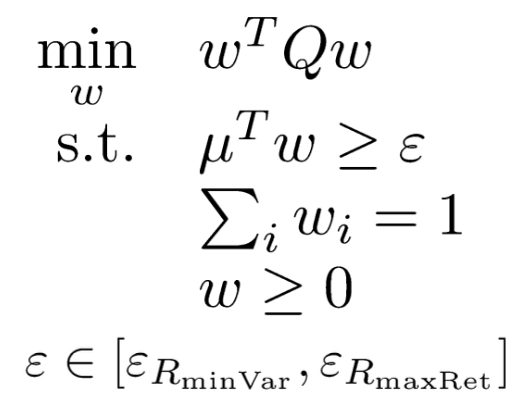

In [11]:
targetLen=50
targetRet = np.linspace(ret_minVar_clas,ret_maxRet_clas,targetLen)

In [12]:
w = cp.Variable(n)
eps = cp.Parameter()
eps.value = targetRet[0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)),
                 [mu.T@w >= eps,
                  sum(w) == 1,
                  w >= 0])
prob3.solve(verbose=False)

print("\nSolution status: ", prob3.status)
print("Solution optimal value: ", prob3.value)
print("Solution w: ")
print(w.value)


Solution status:  optimal
Solution optimal value:  0.0009278939303461074
Solution w: 
[ 3.27228834e-19 -1.14164674e-20 -8.31779470e-22  1.11996569e-19
  1.90865190e-20  1.70008822e-20 -2.67194693e-20  8.07699287e-20
  5.54485957e-02  8.99769675e-20  9.08756702e-20  6.59194971e-01
  9.71731743e-20  3.48205322e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25228507e-20 -1.26927852e-20  4.97857817e-20
  4.42477530e-20  2.33163554e-20  9.01180838e-02  8.74779205e-21
  4.98748717e-02]


In [13]:
w_front_clas = []
var_front_clas = []
ret_front_clas = []
count=0
for epsilon in targetRet:
    eps.value = epsilon
    prob3.solve()
    w_front_clas.append(w.value)
    var_front_clas.append(np.dot(w.value, np.dot(Q, w.value)))
    ret_front_clas.append(np.dot(mu, w.value))

## f) Resampled Efficient Frontier

To compute the resampled efficient frontier, there are two alternatives: perform bootstrapping using the given data points, or resample from a multivariate normal distribution.

I decided to resample from a multivariate normal distribution to avoid variations found in the data points that might influence the resampling.

In [14]:
repetition = 100
np.random.seed(42)

var_minVar_list = []
ret_minVar_list = []
var_maxRet_list = []
ret_maxRet_list = []
w_front_re_list = []
mu_resample_list = []
Q_resample_list = []
var_front_re_list = []
ret_front_re_list = []


for i in range(repetition):
    
    x_resample = np.random.multivariate_normal(mean=mu, cov=Q, size=(monthly_returns_df.shape[0]))
    x_resample= pd.DataFrame(x_resample, index=monthly_returns_df.index, columns=monthly_returns_df.columns)
    
    #Resampled Q and mu
    
    mu_resample = np.array(x_resample.mean())
    Q_resample = np.array(x_resample.cov())
    
    
    #Minimum variance
    
    w1 = cp.Variable(n)
    prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q_resample)),
                     [sum(w1) == 1,
                      w1 >= 0])
    prob1.solve(verbose=False)
    w_minVar = w1.value
    var_minVar = np.dot(w_minVar, np.dot(Q_resample, w_minVar))
    ret_minVar = np.dot(mu_resample, w_minVar)

    
    #Maximum expected return
    
    w2 = cp.Variable(n)
    prob2 = cp.Problem(cp.Maximize(mu_resample.T@w2),
                     [sum(w2) == 1,
                      w2 >= 0])
    prob2.solve(verbose=False)
    w_maxRet = w2.value
    var_maxRet = np.dot(w_maxRet, np.dot(Q_resample, w_maxRet))
    ret_maxRet = np.dot(mu_resample, w_maxRet)

    
    #Target return
    targetRet = np.linspace(ret_minVar,ret_maxRet,targetLen)
        
        
    #Optimization problem and one portfolio on efficient frontier
    w_re = cp.Variable(n)
    eps_re = cp.Parameter()
    
    constraints4 = [mu_resample.T@w_re >= eps_re,sum(w_re) == 1,w_re >= 0]
    prob4 = cp.Problem(cp.Minimize(cp.quad_form(w_re, Q_resample)), constraints4)
    
    
    #Efficient frontier
    w_front_re = []
    var_front_re = []
    ret_front_re = []
    for epsilon in targetRet:
        eps_re.value = epsilon
        prob4.solve(verbose=False, solver='SCS') #If on Google Colab, change solver to cp.ECOS for the code to run
        w_front_re.append(w_re.value)
        var_front_re.append(np.dot(w_re.value, np.dot(Q_resample, w_re.value)))
        ret_front_re.append(np.dot(mu_resample, w_re.value))
    
    var_minVar_list.append(var_minVar)
    ret_minVar_list.append(ret_minVar)
    var_maxRet_list.append(var_maxRet)
    ret_maxRet_list.append(ret_maxRet)
    mu_resample_list.append(mu_resample)
    Q_resample_list.append(Q_resample)
    w_front_re_list.append(w_front_re)
    var_front_re_list.append(var_front_re)
    ret_front_re_list.append(ret_front_re)
    
    
#Average weights at each return level
w_front_re_array=np.array(w_front_re_list)
average_weights=np.mean(w_front_re_array, axis=0)
    
print(average_weights)


#Resampled efficient frontier based on the average weights and orignial mu & Q
w_front_res = []
var_front_res = []
ret_front_res = []
for i in range (len(targetRet)):
    w_front_res.append(average_weights[i])
    var_front_res.append(np.dot(average_weights[i], np.dot(Q, average_weights[i])))
    ret_front_res.append(np.dot(mu, average_weights[i]))

[[ 4.85346352e-07  1.62644608e-04  5.31046515e-08 ...  7.12375395e-02
   1.47145139e-02  4.33639904e-02]
 [ 8.46787818e-04  3.57258395e-05 -1.17976826e-07 ...  5.71127242e-02
   1.63014522e-02  6.75370668e-02]
 [ 5.30771458e-03  5.33466576e-07  5.06608907e-08 ...  4.30546947e-02
   1.82847463e-02  8.30784804e-02]
 ...
 [ 2.33764362e-01 -6.89193253e-07 -3.42092498e-07 ... -3.82720492e-07
  -2.80651141e-07  5.75137501e-04]
 [ 2.15265067e-01 -8.51333452e-07 -4.12811764e-07 ... -4.29037573e-07
  -3.45274839e-07  2.71238084e-04]
 [ 2.04276258e-01 -7.71334453e-07 -3.03281903e-07 ... -2.56663603e-07
  -2.07562056e-07 -2.30876184e-07]]


## Computing the Portfolio Weights

### Classical Efficient Frontier

#### Minimum Variance

In [15]:
orig_weights_minVar = w_front_clas[0]
print("Weights in minimum variance classical solution:\n", orig_weights_minVar)

Weights in minimum variance classical solution:
 [ 3.27228834e-19 -1.14164674e-20 -8.31779470e-22  1.11996569e-19
  1.90865190e-20  1.70008822e-20 -2.67194693e-20  8.07699287e-20
  5.54485957e-02  8.99769675e-20  9.08756702e-20  6.59194971e-01
  9.71731743e-20  3.48205322e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25228507e-20 -1.26927852e-20  4.97857817e-20
  4.42477530e-20  2.33163554e-20  9.01180838e-02  8.74779205e-21
  4.98748717e-02]


#### Maximum Returns

In [16]:
orig_weights_maxRet = w_front_clas[targetLen - 1]
print("Weights in maximum returns classical solution:\n", orig_weights_maxRet)

Weights in maximum returns classical solution:
 [-1.31075956e-15 -6.16531997e-15 -5.19954763e-15 -4.94669922e-15
 -5.26863872e-15 -5.16437002e-15 -6.33878344e-15 -5.85373626e-15
 -5.49016787e-15 -4.51582007e-15 -3.84819898e-15 -4.82623846e-15
  5.15958474e-09 -4.59750315e-15 -6.38736238e-15 -4.54608007e-15
 -5.74464292e-15 -6.86113585e-15  9.99999995e-01 -4.24603682e-15
 -3.09632620e-15 -5.91828648e-15 -5.46382818e-15 -4.93577313e-15
 -4.31384378e-15]


#### Sharpe Ratio

Sharpe ratio measures the excess return per unit of risk in an investment asset or a portfolio. It helps to make portfolios’ performance comparable by making an adjustment for risk.

In [17]:
riskFreeRate = (0.2/100) #This is a monthly rate, and so are our returns

In [18]:
ret_array_clas = np.array(ret_front_clas)
var_array_clas = np.array(var_front_clas)

sharpe_array_clas = (ret_array_clas - riskFreeRate)/np.sqrt(var_array_clas)

weights_sharpe_clas = w_front_clas[sharpe_array_clas.argmax()]
print(sharpe_array_clas)
print(sharpe_array_clas.argmax())
print("Weights in Sharpe ratio classical solution:\n", weights_sharpe_clas)

[0.21841729 0.27800793 0.32774795 0.36827174 0.4008275  0.42613411
 0.44630936 0.46246746 0.47543186 0.48587106 0.49430315 0.50103627
 0.5064046  0.51069581 0.51411326 0.51665943 0.51848227 0.5197395
 0.52055446 0.52102369 0.52122284 0.52121134 0.52103597 0.52073366
 0.52033363 0.51985904 0.5193283  0.51875604 0.51815393 0.51753126
 0.51689544 0.51625237 0.51560673 0.51496224 0.51432183 0.51368778
 0.5130289  0.51215006 0.50586457 0.49160956 0.47226911 0.45041653
 0.42794104 0.40604084 0.38566114 0.3420309  0.28395628 0.23536734
 0.19889106 0.17176165]
20
Weights in Sharpe ratio classical solution:
 [ 3.03160097e-01 -2.60636532e-22 -2.24269267e-22 -1.00105845e-21
  2.73213708e-22  1.34815355e-22  9.93936438e-23  1.36064210e-21
  8.14799348e-22  1.10021151e-22 -1.39598077e-22  4.07725910e-01
  1.68209250e-01 -4.05427468e-22  1.72604307e-21 -1.14245840e-21
 -6.23978378e-22  6.70828058e-22  2.27436297e-02  1.38846486e-22
  9.81611134e-02 -2.22515647e-22 -1.21169386e-21  1.16709230e-22
 -1

### Resampled Efficient Frontier

#### Minimum Variance

In [19]:
res_weights_minVar = w_front_res[0]
print("Weights in minimum variance resampled solution:\n", res_weights_minVar)

Weights in minimum variance resampled solution:
 [ 4.85346352e-07  1.62644608e-04  5.31046515e-08  3.12313689e-03
  2.68703550e-03  2.61896773e-08  6.04659070e-07  8.34181246e-03
  2.88611394e-02  3.85766537e-07  2.42849297e-03  6.38080234e-01
  9.71830865e-05  2.63705806e-02  1.46993949e-02  7.47378649e-02
  6.90997003e-02 -1.13279635e-07  6.11034871e-04 -5.39480458e-08
  1.38173646e-03  5.78327261e-07  7.12375395e-02  1.47145139e-02
  4.33639904e-02]


#### Maximum Returns

In [20]:
res_weights_maxRet = w_front_res[targetLen - 1]
print("Weights in maximum returns resampled solution:\n", res_weights_maxRet)

Weights in maximum returns resampled solution:
 [ 2.04276258e-01 -7.71334453e-07 -3.03281903e-07 -3.22922410e-07
 -1.27960446e-08 -2.64170268e-07 -4.37090053e-07 -4.48111496e-07
 -3.16616742e-07 -2.41258778e-07 -4.22657221e-07 -2.97620966e-07
  4.15723323e-01 -1.91684590e-07  2.91321423e-06 -2.63329073e-07
 -2.92600854e-07 -5.16869322e-07  3.80001751e-01 -3.02745845e-07
  2.14517505e-06 -2.88706325e-07 -2.56663603e-07 -2.07562056e-07
 -2.30876184e-07]


#### Sharpe Ratio

In [21]:
ret_array_res = np.array(ret_front_res)
var_array_res = np.array(var_front_res)

sharpe_array_res = (ret_array_res - riskFreeRate)/np.sqrt(var_array_res)

weights_sharpe_res = w_front_res[sharpe_array_res.argmax()]
print(sharpe_array_res)
print(sharpe_array_res.argmax())
print("Weights in Shapre ratio resampled solution:\n", weights_sharpe_res)

[0.20971985 0.25280937 0.29063568 0.324817   0.35531799 0.3819138
 0.4041343  0.42210918 0.43650239 0.44783506 0.45720036 0.46484334
 0.47108437 0.47595553 0.47979077 0.4830391  0.48570911 0.4878807
 0.48974552 0.49128806 0.4926071  0.49361316 0.49437086 0.4949129
 0.49508208 0.49476506 0.49364986 0.49188319 0.49000543 0.48788614
 0.48500454 0.48185622 0.47842679 0.47446258 0.47011741 0.46444884
 0.45816482 0.45160495 0.44492132 0.43695873 0.42836522 0.41956443
 0.41070065 0.40183929 0.39198726 0.38209561 0.37236332 0.3622557
 0.35081673 0.33352071]
24
Weights in Shapre ratio resampled solution:
 [ 2.97348886e-01 -1.11717899e-07  8.74315160e-08  8.97689965e-03
  9.13211470e-03 -1.16693476e-07 -3.02556118e-07  4.01378934e-04
  4.43669581e-03 -4.29550445e-08  1.25152054e-02  1.69062975e-01
  1.87409250e-01  9.47386418e-03  1.50167556e-03  4.80034641e-02
  1.16249844e-07 -3.40105481e-07  6.13042498e-02  7.96414755e-08
  1.33227087e-01  7.25715270e-08  5.30587830e-03  7.96204517e-03
  4.39

Next, for each of the six portfolios, I will calculate the expected return on the 2022 data for a $1,000 investment.

### 6 Portfolios

In [22]:
ret_2021 = (df_out_of_sample.iloc[-1,:]-df_out_of_sample.iloc[0,:])/(df_out_of_sample.iloc[0,:])
ret_2021= pd.DataFrame(np.array(ret_2021).reshape(1,-1),columns=df_out_of_sample.columns)
ret_2021

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,0.68029,0.446726,0.366112,-0.53201,0.982391,0.522067,0.077665,1.051282,0.029505,0.302017,...,0.521509,0.043312,0.04601,-0.584591,0.269255,0.353931,0.458557,-0.256478,0.261573,0.128286


### 1. Classical Efficient Frontier - Minimum Variance

In [23]:
orig_minVar_ret2021 = np.dot(ret_2021, orig_weights_minVar)
print(orig_minVar_ret2021)

[0.02822425]


### 2. Classical Efficient Fronter - Maximum Returns

In [24]:
orig_maxRet_ret2021 = np.dot(ret_2021, orig_weights_maxRet)
print(orig_maxRet_ret2021)

[-0.58459094]


### 3. Classical Efficient Frontier - Sharpe Ratio

In [25]:
orig_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas)
print(orig_sharpe_ret2021)

[0.27958832]


### 4. Resampled Efficient Frontier - Minimum Variance

In [26]:
res_minVar_ret2021 = np.dot(ret_2021, res_weights_minVar)
print(res_minVar_ret2021)

[0.06115498]


### 5. Resampled Efficient Frontier - Maximum Returns

In [27]:
res_maxRet_ret2021 = np.dot(ret_2021, res_weights_maxRet)
print(res_maxRet_ret2021)

[0.05473655]


### 6. Resampled Efficient Frontier - Sharpe Ratio

In [28]:
res_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_res)
print(res_sharpe_ret2021)

[0.31707397]


In [29]:
print('Out-of-sample returns on $1000 investment: \n')
print('On the Classical Efficient Frontier, the minimum variance portfolio returns $' , orig_minVar_ret2021*1000)
print('On the Classical Efficient Frontier, the maximum return portfolio returns $' , orig_maxRet_ret2021*1000)
print('On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , orig_sharpe_ret2021*1000 , '\n')
print('On the Resampled Efficient Frontier, the minimum variance portfolio returns $' , res_minVar_ret2021*1000)
print('On the Resampled Efficient Frontier, the maximum return portfolio returns $' , res_maxRet_ret2021*1000)
print('On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , res_sharpe_ret2021*1000)

Out-of-sample returns on $1000 investment: 

On the Classical Efficient Frontier, the minimum variance portfolio returns $ [28.22424688]
On the Classical Efficient Frontier, the maximum return portfolio returns $ [-584.59094047]
On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [279.5883226] 

On the Resampled Efficient Frontier, the minimum variance portfolio returns $ [61.15497849]
On the Resampled Efficient Frontier, the maximum return portfolio returns $ [54.73654625]
On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [317.07397343]


## Plotting the Classical and Resampled Efficient Frontiers

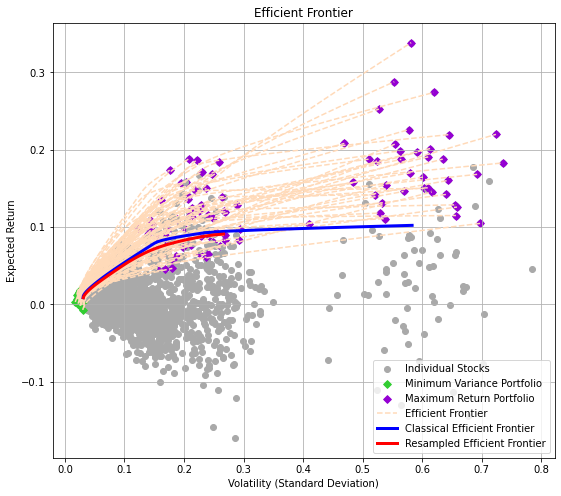

In [30]:
plt.rcParams['figure.figsize'] = [9, 8]
axC = plt.gca()

for i in range(repetition):
    # Plot volatility versus expected return for individual stocks
    axC.scatter(x=np.sqrt(np.diag(Q_resample_list[i])), y=mu_resample_list[i], color='darkgray', label='Individual Stocks' if i == 0 else "")
    
    # Plot volatility versus expected return for mimimum variance portfolio
    axC.scatter(x=np.sqrt(var_minVar_list[i]), y=ret_minVar_list[i], marker='D', s=30,  color='limegreen', label='Minimum Variance Portfolio' if i == 0 else "")

    # Plot volatility versus expected return for maximum return portfolio
    axC.scatter(x=np.sqrt(var_maxRet_list[i]), y=ret_maxRet_list[i],  marker='D', s=30, color='darkviolet', label='Maximum Return Portfolio' if i == 0 else "")

    # Plot efficient frontier
    axC.plot(np.sqrt(var_front_re_list[i]), ret_front_re_list[i], '--', color='peachpuff', label='Efficient Frontier' if i == 0 else "")

#Plot the classical mean-variance efficient frontier
axC.plot(np.sqrt(var_front_clas), ret_front_clas, color='blue', linewidth=3, label='Classical Efficient Frontier')

#Plot the resampled efficient frontier
axC.plot(np.sqrt(var_front_res), ret_front_res, color='red', linewidth=3, label='Resampled Efficient Frontier')

axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
axC.legend(loc="lower right")
axC.grid()
plt.show()

The resampled efficient frontier (REF) is more conservative because the portfolio that achieves maximum returns has a lower return than that of the classical efficient frontier, however, it also has a lower risk associated with the portfolio. 

As seen in an article from Michaud and Michaud, it can be thought of as a constraint based on the level of information in the forecasts. Although it lowers the in-sample expectations, REF improves the out-of-sample performance.

## Plotting the Portfolio Compositions for the Classical and Resampled Frontiers

### Classical Efficient Frontier

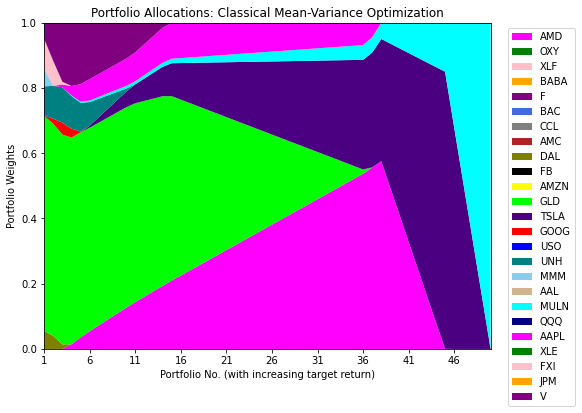

In [31]:
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(w_front_clas).T, colors=color_list)
plt.legend(df_in_sample.columns, bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Classical Mean-Variance Optimization")
plt.show()

### Resampled Efficient Frontier

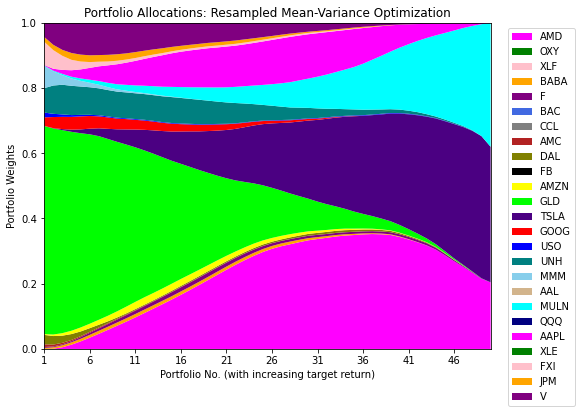

In [32]:
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(average_weights).T, colors=color_list)
plt.legend(df_in_sample.columns, bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Resampled Mean-Variance Optimization")
plt.show()

The transaction from one risk level to another is much smoother with the REF than with the classical frontier. This means if an investor decides they want to have more risk (more variance) in their returns, they will incrementally go to a point that is closer to the right. Notice that in the classical plot, the changes from one portfolio to the next can be very drastic, while in the REF, the changes are smoother which makes it more robust. 

Additionally, looking at the portfolio with the highest risk in both plots, for the classical, the investor would put all their eggs in one basket (MULN), while in the REF, it is more diversified and more realistically acceptable as an investment.

REF is more robust and more sensitive to uncertainty, this property allows it to adapt to people’s preferences better, meaning for those who are more risk averse would choose portfolios on the right, but others who are less risk averse would choose portfolios on the left side of the graph. However, the difference in investment is not that drastic, it still accounts for the natural property of stocks and the uncertainty that lies within assigning a large weight to a single asset or a few assets.

As shown in the Markowitz-Usmen results, it turns out that the classical efficient frontier creates extreme portfolios that perform poorly in other data (in our case the out-of-sample data) because it overuses the investment information. This is shown in the data in the table. For every scenario of min variance, max return, and Sharpe ratio, the REF performed at least 13% better than the classical efficient frontier that is because in the out-of-sample data, the closing prices in 2021 are much different than the ones in the in-sample data, which are the closing prices from 2018 to 2020. The classical efficient frontier was not robust enough to adapt to the change, as I previously said, the changes are drastic unlike with the REF. This can be thought of as if the classical efficient frontier is overfitting to the in-sample data and performing poorly on the out-of-sample data.

Currently, more research is being done on how to even optimize the REF further, given that it might assign some non-zero weights to investment nuisances. One of the solutions includes imposing Bayesian prior constraints to act as an accommodation to the presence of unattractive assets in the optimization universe that REF might select to invest in.